[11, 10, 1, 12, 0, 4, 6, 8, 2, 9, 3, 5, 7]


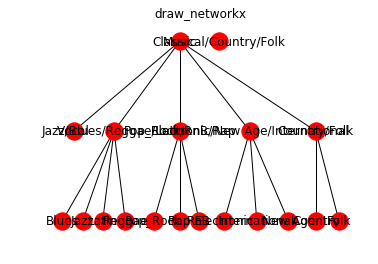

In [3]:
%matplotlib inline
import networkx as nx 
import matplotlib.pyplot as plt
import numpy as np
import pickle


genres = ['Blues', 'Country', 'Electronic', 'Folk', 'International', 'Jazz', 'Latin', 'New Age', 'Pop_Rock', 'Rap', 
          'Reggae', 'RnB', 'Vocal']
with open('class_dict.pickle', 'rb') as f:
    class_dict = pickle.load(f)
genre_order = [class_dict[g] for g in genres]
print(genre_order)
G = nx.DiGraph()
# Digraph just for the plot
# Root node
G.add_node('Music')

# Genre nodes
for g in genres:
    G.add_node(g)

G.add_node('Jazz/Blues/Reggae/Latin')
G.add_node('Pop_Rock/RnB/Rap')
G.add_node('Classical/Country/Folk')
G.add_node('Vocal')

G.add_edge('Music', 'Pop_Rock/RnB/Rap')
G.add_edge('Music', 'Electronic/New Age/International')
G.add_edge('Music', 'Jazz/Blues/Reggae/Latin')
G.add_edge('Music', 'Country/Folk')
G.add_edge('Music', 'Vocal')

G.add_edge('Pop_Rock/RnB/Rap', 'Pop_Rock')
G.add_edge('Pop_Rock/RnB/Rap', 'RnB')
G.add_edge('Pop_Rock/RnB/Rap', 'Rap')

G.add_edge('Electronic/New Age/International', 'Electronic')
G.add_edge('Electronic/New Age/International', 'New Age')
G.add_edge('Electronic/New Age/International', 'International')

G.add_edge('Jazz/Blues/Reggae/Latin', 'Jazz')
G.add_edge('Jazz/Blues/Reggae/Latin', 'Blues')
G.add_edge('Jazz/Blues/Reggae/Latin', 'Reggae')
G.add_edge('Jazz/Blues/Reggae/Latin', 'Latin')

G.add_edge('Country/Folk', 'Country')
G.add_edge('Country/Folk', 'Folk')

plt.title('draw_networkx')
pos = nx.drawing.nx_pydot.graphviz_layout(G, prog='dot')
nx.draw(G, pos, with_labels=True, arrows=False)
plt.show()

G = nx.Graph(G)

In [9]:
C = np.zeros((len(genres), len(genres)), dtype=np.float32)
for k in range(0, len(genres)):
    g = genres[k]
    for i in range(0, len(genres)):
        C[k, i] = nx.shortest_path_length(G, g, genres[i])
    C[k, :] = C[k, :] / np.max(C[k, :])
C_ordered = np.zeros((len(genres), len(genres)), dtype=np.float32)
print(genres)
for k in range(0, len(genres)):
    for i in range(0, len(genres)):
        C_ordered[class_dict[genres[k]], class_dict[genres[i]]] = C[k, i]
print(C_ordered)
print(C_ordered.shape)
np.save('C_matrix.npy', C_ordered)

['Blues', 'Country', 'Electronic', 'Folk', 'International', 'Jazz', 'Latin', 'New Age', 'Pop_Rock', 'Rap', 'Reggae', 'RnB', 'Vocal']
[[0.   0.5  1.   1.   1.   1.   1.   0.75 0.5  1.   1.   1.   1.  ]
 [0.5  0.   1.   1.   1.   1.   1.   0.75 0.5  1.   1.   1.   1.  ]
 [1.   1.   0.   1.   1.   0.5  1.   0.75 1.   0.5  1.   1.   1.  ]
 [1.   1.   1.   0.   0.5  1.   0.5  0.75 1.   1.   1.   0.5  1.  ]
 [1.   1.   1.   0.5  0.   1.   0.5  0.75 1.   1.   1.   0.5  1.  ]
 [1.   1.   0.5  1.   1.   0.   1.   0.75 1.   0.5  1.   1.   1.  ]
 [1.   1.   1.   0.5  0.5  1.   0.   0.75 1.   1.   1.   0.5  1.  ]
 [1.   1.   1.   1.   1.   1.   1.   0.   1.   1.   1.   1.   1.  ]
 [0.5  0.5  1.   1.   1.   1.   1.   0.75 0.   1.   1.   1.   1.  ]
 [1.   1.   0.5  1.   1.   0.5  1.   0.75 1.   0.   1.   1.   1.  ]
 [1.   1.   1.   1.   1.   1.   1.   0.75 1.   1.   0.   1.   0.5 ]
 [1.   1.   1.   0.5  0.5  1.   0.5  0.75 1.   1.   1.   0.   1.  ]
 [1.   1.   1.   1.   1.   1.   1.   0.75 1.   1.  